# Viscosimetro

## Set

In [2]:
import glob
import math
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
graph_base_name = '../grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [4]:
palette = sns.husl_palette(24)
print(' ', [' '+str(x) for x in range(6)],' ', [' '+str(x+6) for x in range(6)], ['_'+str(x+12) for x in range(6)], [str(x+18) for x in range(6)])
palette

  [' 0', ' 1', ' 2', ' 3', ' 4', ' 5']   [' 6', ' 7', ' 8', ' 9', ' 10', ' 11'] ['_12', '_13', '_14', '_15', '_16', '_17'] ['18', '19', '20', '21', '22', '23']


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9699521567340649, 0.4569882390259858, 0.36385324448493633),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6666319352625271, 0.6197366714155128, 0.19396267878823373),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.49382662140640926, 0.6649121332643736, 0.19300804648700284),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.20703735729643508, 0.6824290013722435, 0.5885318893529169),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21387918628643265, 0.6720135434784761, 0.693961140878689),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.4768773964929644, 0.5974418160509446, 0.9584992622400258),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.774710828527837, 0.49133823414365724, 0.9580114121137316),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671),
 (0.9656056642634557, 0.4245907603266889, 0.6579786740552919)]

## FN

In [5]:
def fn_sdom(arr):
    mean = np.mean(arr)
    sum = np.sum((arr-mean)**2)
    std = (sum / (arr.size - 1)) ** .5
    return std / (arr.size) ** .5

In [6]:
def fit(X,Y):
    N = X.size
    DELTA = N * (X ** 2).sum() - (X.sum()) ** 2
    a = ((X**2).sum()*(Y.sum()) - (X.sum())*(X*Y).sum()) / DELTA # q
    b = (N*(X*Y).sum() - (X.sum())*(Y.sum())) / DELTA            # m
    #
    SIGy = ((((a+b*X)-Y)**2).sum()/ (N-2)) ** .5
    SIGa = SIGy * ((X**2).sum() / DELTA) ** .5
    SIGb = SIGy * (N / DELTA) ** .5
    return a, SIGa, b, SIGb

## Data

In [7]:
pc_to_mm = lambda pc: pc * 25.4

diametri = [1.5]
diametri.append(pc_to_mm(2/32))
diametri.append(2)

pcs = [3,4,5,6,7,8,9]
mms = [pc_to_mm(x/32) for x in pcs]

diametri = diametri + mms
diametri_sig = 0.001 / 100

diametri = np.array(diametri)
diametri = diametri / 1000
diametri

array([0.0015    , 0.0015875 , 0.002     , 0.00238125, 0.003175  ,
       0.00396875, 0.0047625 , 0.00555625, 0.00635   , 0.00714375])

In [8]:
rho_acciaio = 7.870 * 1000
rho_acciaio_sig = 0.005 * 1000

rho_liquido = 1.032 * 1000
rho_liquido_sig = 0.001 * 1000

acc_gravita = 9.806
acc_gravita_sig = 0.001

cronometro_sig = 0.00005

## A

### Import

In [9]:
fA = glob.glob('./misure/A*')

lA = [np.genfromtxt(f).T for f in fA]

### Medie

In [10]:
mA = [x.mean(axis=0) for x in lA]
mA

[array([  0.     ,  25.5113 ,  51.17758,  76.79378, 102.45284, 127.99312,
        153.9262 , 179.6028 , 205.32128, 230.89884, 256.59858]),
 array([  0.     ,  21.91378,  43.96468,  66.06248,  88.27556, 110.29392,
        132.3635 , 154.5366 , 176.82284, 198.98046, 221.27404]),
 array([  0.     ,  14.17108,  28.36666,  42.57412,  56.88004,  71.1135 ,
         85.41686,  99.62726, 113.87266, 128.0144 , 142.46558]),
 array([ 0.     ,  9.60452, 19.32586, 29.1184 , 38.75368, 48.55176,
        58.30356, 68.0564 , 77.84786, 87.55404, 97.46294])]

In [11]:
mA_sig = [np.apply_along_axis(fn_sdom, 0, x) for x in lA]
mA_sig

[array([0.        , 0.07599596, 0.18616438, 0.16412906, 0.117919  ,
        0.13955102, 0.22453285, 0.21814309, 0.25980308, 0.23645421,
        0.27378009]),
 array([0.        , 0.14323426, 0.18543818, 0.25627706, 0.27323366,
        0.40660006, 0.47250798, 0.49008238, 0.62209734, 0.65593439,
        0.68322039]),
 array([0.        , 0.07394351, 0.08734515, 0.1255111 , 0.14097754,
        0.1883715 , 0.25642615, 0.2684293 , 0.28526669, 0.23471603,
        0.36038498]),
 array([0.        , 0.04895899, 0.07867371, 0.12044228, 0.14879863,
        0.16229348, 0.21624608, 0.22131392, 0.25969751, 0.29100492,
        0.3015565 ])]

### Fit velocità

In [15]:
distsA = np.array([x*5/100 for x in range(0,11)])

fitsA = [fit(distsA,x) for x in mA]
fitsA

[(-0.15967818181819862,
  0.05835579494382673,
  513.4664654545455,
  0.19727859353936003),
 (-0.2396299999999285,
  0.07980321801624594,
  442.5904690909089,
  0.2697841169898306),
 (-0.08445272727272851,
  0.03645809509608125,
  284.88405090909083,
  0.12325085675899972),
 (-0.13393727272727088,
  0.04308837365788208,
  194.9281199999999,
  0.14566528930516467)]

In [16]:
vlA = [1/x for x in [y[2] for y in fitsA]]
vlA

[0.0019475468551091283,
 0.002259425066368969,
 0.003510200015792072,
 0.005130096160574475]

In [17]:
vlA_sig = []

for i in range(len(vlA)):
    x = fitsA[i][2]
    x_sig = fitsA[i][3]

    s = x_sig / x**2
    vlA_sig.append(s)

vlA_sig
    

[7.482656225422859e-07,
 1.3772483571259135e-06,
 1.518635943153887e-06,
 3.8336025679280945e-06]

### Plot velocità limite

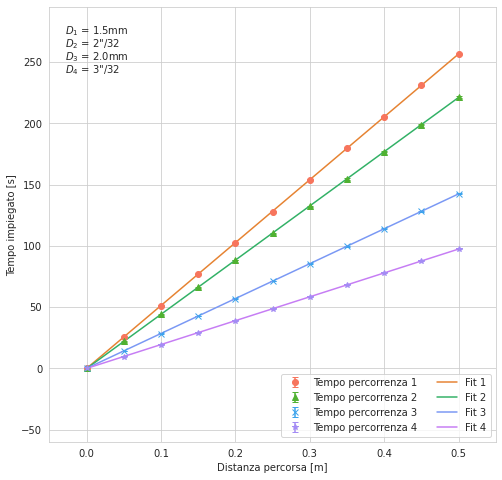

In [18]:
symbs = iter(['o', '^', 'x', '*'])
clrs = iter([palette[x] for x in [1, 2, 8, 9, 16, 17, 18, 19]])

def plotA(n):
    diametro = diametri[n]
    arr = mA[n]
    fit = fitsA[n]

    #

    X = distsA
    Y = arr
    # Yerr = [cronometro_sig for _ in range(11)]
    Yerr = mA_sig[n]

    plt.errorbar(X, Y, Yerr, fmt=next(symbs), capsize=3, label='Tempo percorrenza ' + str(n+1), color=next(clrs))
    
    #

    fn = lambda x: fit[2] * x + fit[0]
    Y = [fn(x) for x in X]
    
    plt.plot(X, Y, '-', label='Fit ' + str(n+1), color=next(clrs))

    #

    plt.xlabel('Distanza percorsa [m]')
    plt.ylabel('Tempo impiegato [s]')

    plt.xlim(-.05,.55)
    plt.ylim(-60,295)

    # plt.show()

plt.figure(figsize=(8,8))

for i, _ in enumerate(mA):
    plotA(i)

order = [4,5,6,7,0,1,2,3]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower right', ncol=2)

mx = -.045
my = -.035
plt.text(0.08+mx, 0.98+my, '$D_1$ = 1.5mm', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.95+my, '$D_2$ = 2"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.92+my, '$D_3$ = 2.0mm', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.89+my, '$D_4$ = 3"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.savefig(graph_base_name+'set1', dpi=200)


In [19]:
(np.array(diametri[:4]) ** 2) * np.array([x[2] for x in fitsA])

array([0.0011553 , 0.0011154 , 0.00113954, 0.00110531])

## B

### Import

In [20]:
fB = glob.glob('./misure/B*')

lB = [np.genfromtxt(f).T for f in fB]

### Medie

In [21]:
mB = [x.mean(axis=0) for x in lB]
mB

[array([ 0.     , 10.57986, 21.01662, 31.78552, 42.45284, 53.093  ]),
 array([ 0.     ,  6.6448 , 13.2958 , 19.94308, 26.53912, 33.23394])]

In [22]:
mB_sig = [np.apply_along_axis(fn_sdom, 0, x) for x in lB]
mB_sig

[array([0.        , 0.01265241, 0.2028749 , 0.03280228, 0.05343034,
        0.02362577]),
 array([0.        , 0.03624092, 0.01334099, 0.0300806 , 0.02560028,
        0.03142276])]

### Fit velocità

In [23]:
distsB = np.array([x*10/100 for x in range(0,6)])

fitsB = [fit(distsB,x) for x in mB]
fitsB

[(-0.07294380952381677,
  0.06714309750852095,
  106.24366857142859,
  0.22176635230568273),
 (0.0023180952380961284,
  0.01498176711071187,
  66.42855428571428,
  0.04948314817936685)]

In [24]:
vlB = [1/x for x in [y[2] for y in fitsB]]
vlB

[0.009412325585573044, 0.015053767325703396]

In [25]:
vlB_sig = []

for i in range(len(vlB)):
    x = fitsB[i][2]
    x_sig = fitsB[i][3]

    s = x_sig / x**2
    vlB_sig.append(s)

vlB_sig
    

[1.9646696503355846e-05, 1.1213668688792878e-05]

### Plot velocità limite

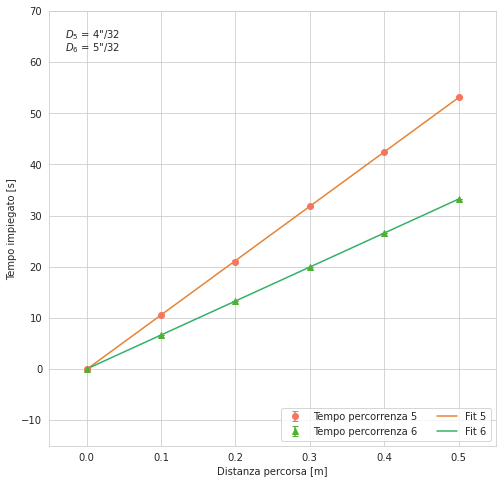

In [26]:
symbs = iter(['o', '^', 'x', '*'])
clrs = iter([palette[x] for x in [1, 2, 8, 9, 16, 17, 18, 19]])

def plotB(n):
    diametro = diametri[n]
    arr = mB[n]
    fit = fitsB[n]

    #

    X = distsB
    Y = arr
    # Yerr = [cronometro_sig for _ in range(6)]
    Yerr = mB_sig[n]

    n = n+4
    
    plt.errorbar(X, Y, Yerr, fmt=next(symbs), capsize=3, label='Tempo percorrenza ' + str(n+1), color=next(clrs))
    
    #

    fn = lambda x: fit[2] * x + fit[0]
    Y = [fn(x) for x in X]
    
    plt.plot(X, Y, '-', label='Fit ' + str(n+1), color=next(clrs))

    #

    plt.xlabel('Distanza percorsa [m]')
    plt.ylabel('Tempo impiegato [s]')

    plt.xlim(-.05,.55)
    plt.ylim(-15,70)

    # plt.show()

plt.figure(figsize=(8,8))

for i, _ in enumerate(mB):
    plotB(i)

order = [2,3,0,1]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower right', ncol=2)

mx = -.045
my = -.035
plt.text(0.08+mx, 0.98+my, '$D_5$ = 4"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.95+my, '$D_6$ = 5"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.savefig(graph_base_name+'set2', dpi=200)


In [27]:
(np.array(diametri[4:6]) ** 2) * np.array([x[2] for x in fitsB])

array([0.001071  , 0.00104631])

## C

### Import

In [28]:
fC = glob.glob('./misure/C*')

lC = [np.genfromtxt(f).T for f in fC]

### Medie

In [29]:
mC = [x.mean(axis=0) for x in lC]
mC

[array([ 0.    , 21.9868]),
 array([ 0.     , 14.96592]),
 array([0.     , 9.27546]),
 array([0.     , 4.98606])]

### Fit velocità

In [30]:
distsC = np.array([0, 50/100])

In [31]:
tempiC = np.array([x[1] for x in mC])
tempiC

array([21.9868 , 14.96592,  9.27546,  4.98606])

In [32]:
vlC = [.5 / x for x in tempiC]
vlC

[0.022740917277639314,
 0.03340923912462448,
 0.05390568230578322,
 0.10027957946755554]

In [33]:
vlC_sig = []

for i in range(4):
    S = .5
    T = tempiC[i]
    sigS = 0.05/3
    sigT = 0.00005/3

    sig = ((sigS/T)**2 + ((S*sigT)/T**2)**2) ** .5
    vlC_sig.append(sig)

vlC_sig

[0.0007580305761173178,
 0.0011136413047756599,
 0.0017968560794701133,
 0.0033426526657253657]

### Plot velocità limite

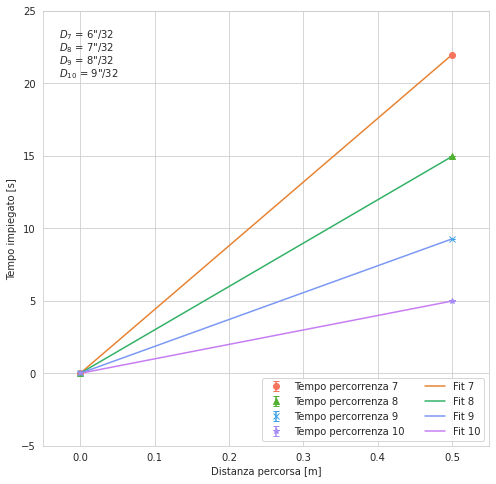

In [34]:
symbs = iter(['o', '^', 'x', '*'])
clrs = iter([palette[x] for x in [1, 2, 8, 9, 16, 17, 18, 19]])

def plotC(n):
    diametro = diametri[n]
    arr = mC[n]
    tmp = tempiC[n]
    n = n+6

    #

    X = distsC
    Y = arr
    Yerr = [cronometro_sig for _ in range(2)]

    plt.errorbar(X, Y, Yerr, fmt=next(symbs), capsize=3, label='Tempo percorrenza ' + str(n+1), color=next(clrs))
    
    #

    plt.plot([0, .5], [0, tmp], '-', label='Fit ' + str(n+1), color=next(clrs))

    #

    plt.xlabel('Distanza percorsa [m]')
    plt.ylabel('Tempo impiegato [s]')

    plt.xlim(-.05,.55)
    plt.ylim(-5,25)

    # plt.show()

plt.figure(figsize=(8,8))

for i, _ in enumerate(mC):
    plotC(i)

order = [4,5,6,7,0,1,2,3]
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower right', ncol=2)

mx = -.045
my = -.035
plt.text(0.08+mx, 0.98+my, '$D_7$ = 6"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.95+my, '$D_8$ = 7"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.92+my, '$D_9$ = 8"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.08+mx, 0.89+my, '$D_{10}$ = 9"/32', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.savefig(graph_base_name+'set3', dpi=200)


In [35]:
(np.array(diametri[6:]) ** 2) / vlC

array([0.00099738, 0.00092405, 0.00074802, 0.00050891])

## Calcolo viscosità

### Velicità limite

In [215]:
vl = np.array(vlA + vlB + vlC)
vl

array([0.00194755, 0.00225943, 0.0035102 , 0.0051301 , 0.00941233,
       0.01505377, 0.02274092, 0.03340924, 0.05390568, 0.10027958])

In [216]:
vl_sig = np.array(vlA_sig + vlB_sig + vlC_sig)
vl_sig

array([7.48265623e-07, 1.37724836e-06, 1.51863594e-06, 3.83360257e-06,
       1.96466965e-05, 1.12136687e-05, 7.58030576e-04, 1.11364130e-03,
       1.79685608e-03, 3.34265267e-03])

### Viscosità pes

In [217]:
viscs = np.array(((diametri ** 2) * acc_gravita * (rho_acciaio - rho_liquido)) / (18 * vl))

In [218]:
viscs

array([4.30371083, 4.15506676, 4.24498938, 4.11749386, 3.98968858,
       3.89772116, 3.71544194, 3.44227412, 2.78651499, 1.89578233])

In [219]:
viscs_sig = []

for i in range(10):
    D = diametri[i]
    v = vl[i]
    v_sig = vl_sig[i]

    d1 = (D * acc_gravita * (rho_acciaio - rho_liquido) * diametri_sig) / (9 * v)
    d2 = (D**2 * (rho_acciaio - rho_liquido) * acc_gravita_sig) / (18 * v)
    d3 = (D**2 * acc_gravita * rho_acciaio_sig) / (18 * v)
    d4 = (D**2 * acc_gravita * rho_liquido_sig) / (18 * v)
    d5 = (D**2 * acc_gravita * (rho_acciaio - rho_liquido) * v_sig) / (18 * v**2)

    sig = (d1**2 + d2**2 + d3**2 + d4**2 + d5**2) ** .5
    viscs_sig.append(sig)

viscs_sig

[0.05749793847062893,
 0.05250175181487833,
 0.04260954992038867,
 0.034857263739265246,
 0.026645477083121205,
 0.020071027250442904,
 0.12485837331969023,
 0.11543861804720314,
 0.09332111438613655,
 0.06343129080798225]

In [220]:
viscs_pesi = np.array([1/x**2 for x in viscs_sig])
viscs_pesi

array([ 302.47915591,  362.78758006,  550.79007563,  823.02573476,
       1408.48750545, 2482.33733278,   64.14527257,   75.04085297,
        114.82598181,  248.53805853])

In [221]:
visc_pes = np.sum(viscs * viscs_pesi) / np.sum(viscs_pesi)
visc_pes

3.905001086716213

In [222]:
visc_pes_sig = 1/(np.sum(viscs_pesi))**.5
visc_pes_sig

0.012468423228747142

### Plot diametri / velocità

In [223]:
inv_vl = 1 / vl
inv_vl

array([513.46646545, 442.59046909, 284.88405091, 194.92812   ,
       106.24366857,  66.42855429,  43.9736    ,  29.93184   ,
        18.55092   ,   9.97212   ])

In [224]:
inv_vl_sig = vl_sig / vl**2
inv_vl_sig

array([0.19727859, 0.26978412, 0.12325086, 0.14566529, 0.22176635,
       0.04948315, 1.46578667, 0.997728  , 0.618364  , 0.332404  ])

In [225]:
fitsP = fit(1/diametri**2, 1/vl)
fitsP

(-9.09738271022678,
 2.0453486562456273,
 0.0011616707788379022,
 9.470357260093309e-06)

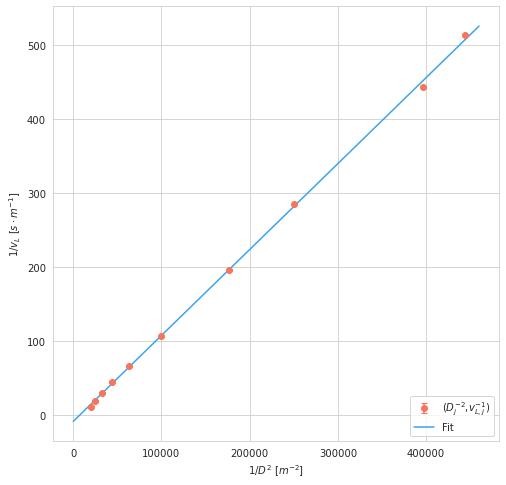

In [240]:
def plot():
    plt.figure(figsize=(8,8))

    plt.errorbar(1/diametri**2, inv_vl, inv_vl_sig, fmt='o', capsize=3, label='($D_j^{-2}$,$v_{L,j}^{-1}$)', color=palette[1])
    

    fn = lambda x: fitsP[2]*x + fitsP[0]
    plt.plot([-10,460000], [fn(-10), fn(460000)], label='Fit', color=palette[16])

    plt.xlabel('1/$D^2$ [$m^{-2}$]')
    plt.ylabel('1/$v_L$ [$s\\cdot m^{-1}$]')

    order = [1,0]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='lower right', ncol=1)

    plt.savefig(graph_base_name+'inv_su_inv', dpi=200)

plot()

In [227]:
B = fitsP[2]
B_sig = fitsP[3]

In [228]:
visc = B * acc_gravita * (rho_acciaio - rho_liquido) / 18
visc

4.327444884917288

In [229]:
d1 = acc_gravita * (rho_acciaio - rho_liquido) * B_sig / 18
d2 = B * (rho_acciaio - rho_liquido) * acc_gravita_sig / 18
d3 = B * acc_gravita * rho_acciaio_sig / 18
d4 = B * acc_gravita * rho_liquido_sig / 18

visc_sig = (d1**2 + d2**2 + d3**2 + d4**2) ** .5
visc_sig

0.035428907551254954

### Plot confronto

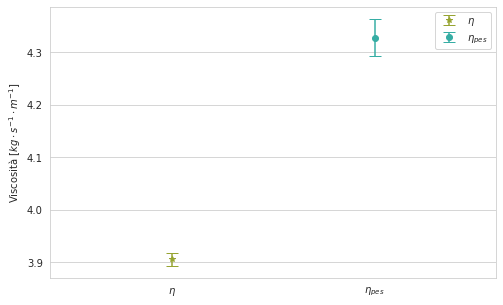

In [231]:
def plot4():
    X = [0, 1]
    Xlab = ['$\eta$', '$\eta_{pes}$']

    Y = [visc_pes, visc]
    Yerr = [visc_pes_sig, visc_sig]

    plt.figure(figsize=(8,5))

    plt.errorbar([0], Y[0], Yerr[0], fmt='*', capsize=6, color=palette[6], label='$\eta$')
    plt.errorbar([1], Y[1], Yerr[1], fmt='o', capsize=6, color=palette[12], label='$\eta_{pes}$')

    plt.gca().grid(axis='x')

    plt.xlim(-.6,1.6)
    # plt.ylim(0.003,0.005)

    plt.xticks(X, Xlab)
    plt.ylabel('Viscosità [$kg \\cdot m^{-1} \\cdot s^{-1}$]')

    plt.legend(loc='upper right')
    
    plt.savefig(graph_base_name+'viscosita', dpi=200)

plot4()

## Export Excel

In [13]:
pd.DataFrame(mA).to_excel('dump.xlsx')

In [14]:
pd.DataFrame(mA_sig).to_excel('dump.xlsx')

In [36]:
pd.DataFrame(mB).to_excel('dump.xlsx')

In [37]:
pd.DataFrame(mB_sig).to_excel('dump.xlsx')

In [38]:
pd.DataFrame(mC).to_excel('dump.xlsx')